In [9]:
import tensorflow as tf
import numpy as np
from tensorflow.python.client import device_lib

# Versions
print("🔢 TensorFlow Version:", tf.__version__)
print("🔢 NumPy Version:", np.__version__)

# GPU Availability
physical_gpus = tf.config.list_physical_devices('GPU')
logical_gpus = tf.config.list_logical_devices('GPU')
print("\n✅ Physical GPUs:", physical_gpus)
print("🧱 Logical GPUs:", logical_gpus)

# Device details (GPU only)
print("\n📊 GPU Device Details:")
for device in device_lib.list_local_devices():
    if device.device_type == 'GPU':
        print(f"📍 Name: {device.name}")
        print(f"💾 Memory Limit: {device.memory_limit / (1024 ** 3):.2f} GB")
        print(f"📝 Description: {device.physical_device_desc}")
        print("-" * 50)

# Enable memory growth
if physical_gpus:
    try:
        for gpu in physical_gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("✅ Memory growth enabled for all GPUs.")
    except RuntimeError as e:
        print("⚠️ Could not enable memory growth:", e)
else:
    print("❌ No physical GPU detected.")


🔢 TensorFlow Version: 2.10.1
🔢 NumPy Version: 1.26.4

✅ Physical GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
🧱 Logical GPUs: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]

📊 GPU Device Details:
📍 Name: /device:GPU:0
💾 Memory Limit: 1.61 GB
📝 Description: device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
--------------------------------------------------
⚠️ Could not enable memory growth: Physical devices cannot be modified after being initialized


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
import yfinance as yf
import datetime

stock = "GOOG"
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

yf.download(stock, start=start, end=end).to_csv(stock + ".csv")

C:\Users\arpit\AppData\Local\Temp\ipykernel_13764\1157033699.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf.download(stock, start=start, end=end).to_csv(stock + ".csv")
[*********************100%***********************]  1 of 1 completed


In [70]:
df = pd.read_csv(stock + ".csv")
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
1,Date,NaN,NaN,NaN,NaN,NaN
2,2004-08-19,2.484365940093994,2.5764703120685986,2.3759195065357432,2.4759468785637146,897427216
3,2004-08-20,2.6816985607147217,2.7007631515270396,2.488327040389078,2.500953972188937,458857488
4,2004-08-23,2.708686113357544,2.8097046474911545,2.7000205627511846,2.7421113618796227,366857939


In [71]:
df.shape

(5245, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245 entries, 0 to 5244
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   5245 non-null   object
 1   Close   5244 non-null   object
 2   High    5244 non-null   object
 3   Low     5244 non-null   object
 4   Open    5244 non-null   object
 5   Volume  5244 non-null   object
dtypes: object(6)
memory usage: 246.0+ KB


In [72]:
df.isnull().sum()

Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64

In [73]:
df.dropna(inplace=True)

In [17]:
df.columns

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [18]:
df.iloc[0:1,]

,Price,Close,High,Low,Open,Volume
0,Ticker,GOOG,GOOG,GOOG,GOOG,GOOG


In [74]:
df.drop(0, axis=0, inplace=True)
df.head()

,Price,Close,High,Low,Open,Volume
2,2004-08-19,2.484365940093994,2.5764703120685986,2.3759195065357432,2.4759468785637146,897427216
3,2004-08-20,2.6816985607147217,2.7007631515270396,2.488327040389078,2.500953972188937,458857488
4,2004-08-23,2.708686113357544,2.8097046474911545,2.7000205627511846,2.7421113618796227,366857939
5,2004-08-24,2.5965256690979004,2.7631563190761623,2.564338086520178,2.7542433305673386,306396159
6,2004-08-25,2.6245033740997314,2.6740230033000816,2.572013301877542,2.598753451327233,184645512


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5243 entries, 2 to 5244
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   5243 non-null   object
 1   Close   5243 non-null   object
 2   High    5243 non-null   object
 3   Low     5243 non-null   object
 4   Open    5243 non-null   object
 5   Volume  5243 non-null   object
dtypes: object(6)
memory usage: 286.7+ KB


In [75]:
df['Date'] = df['Price'].astype('datetime64[ns]')

In [22]:
df.head()

,Price,Close,High,Low,Open,Volume,Date
2,2004-08-19,2.484365940093994,2.5764703120685986,2.3759195065357432,2.4759468785637146,897427216,2004-08-19
3,2004-08-20,2.6816985607147217,2.7007631515270396,2.488327040389078,2.500953972188937,458857488,2004-08-20
4,2004-08-23,2.708686113357544,2.8097046474911545,2.7000205627511846,2.7421113618796227,366857939,2004-08-23
5,2004-08-24,2.5965256690979004,2.7631563190761623,2.564338086520178,2.7542433305673386,306396159,2004-08-24
6,2004-08-25,2.6245033740997314,2.6740230033000816,2.572013301877542,2.598753451327233,184645512,2004-08-25


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5243 entries, 2 to 5244
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Price   5243 non-null   object        
 1   Close   5243 non-null   object        
 2   High    5243 non-null   object        
 3   Low     5243 non-null   object        
 4   Open    5243 non-null   object        
 5   Volume  5243 non-null   object        
 6   Date    5243 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 327.7+ KB


In [76]:
df.drop('Price', axis=1, inplace=True)

In [25]:
df.head()

,Close,High,Low,Open,Volume,Date
2,2.484365940093994,2.5764703120685986,2.3759195065357432,2.4759468785637146,897427216,2004-08-19
3,2.6816985607147217,2.7007631515270396,2.488327040389078,2.500953972188937,458857488,2004-08-20
4,2.708686113357544,2.8097046474911545,2.7000205627511846,2.7421113618796227,366857939,2004-08-23
5,2.5965256690979004,2.7631563190761623,2.564338086520178,2.7542433305673386,306396159,2004-08-24
6,2.6245033740997314,2.6740230033000816,2.572013301877542,2.598753451327233,184645512,2004-08-25


In [77]:
df[['Close', 'Open', 'High', 'Low', 'Volume']] = df[['Close', 'Open', 'High', 'Low', 'Volume']].astype('float')

In [27]:
df.head()

,Close,High,Low,Open,Volume,Date
2,2.484366,2.576470,2.375920,2.475947,897427216.0,2004-08-19
3,2.681699,2.700763,2.488327,2.500954,458857488.0,2004-08-20
4,2.708686,2.809705,2.700021,2.742111,366857939.0,2004-08-23
5,2.596526,2.763156,2.564338,2.754243,306396159.0,2004-08-24
6,2.624503,2.674023,2.572013,2.598753,184645512.0,2004-08-25


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5243 entries, 2 to 5244
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   5243 non-null   float64       
 1   High    5243 non-null   float64       
 2   Low     5243 non-null   float64       
 3   Open    5243 non-null   float64       
 4   Volume  5243 non-null   float64       
 5   Date    5243 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 286.7 KB


In [78]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [79]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2004-08-19,2.484366,2.576470,2.375920,2.475947,897427216.0
2004-08-20,2.681699,2.700763,2.488327,2.500954,458857488.0
2004-08-23,2.708686,2.809705,2.700021,2.742111,366857939.0
2004-08-24,2.596526,2.763156,2.564338,2.754243,306396159.0
2004-08-25,2.624503,2.674023,2.572013,2.598753,184645512.0


In [31]:
df.describe()

,Close,High,Low,Open,Volume
count,5243.000000,5243.000000,5243.000000,5243.000000,5.243000e+03
mean,50.417242,50.940547,49.883294,50.397953,1.117199e+08
std,49.466957,50.008537,48.931144,49.442470,1.478299e+08
min,2.476194,2.519029,2.375920,2.455892,1.584340e+05
25%,13.133290,13.288284,13.008006,13.153840,2.627397e+07
50%,28.105318,28.385178,27.866894,28.154885,5.003400e+07
75%,69.276958,70.191277,68.496644,69.160900,1.358132e+08
max,207.224548,208.212225,203.782599,204.022044,1.650833e+09


In [32]:
###import plotly.io as pio
###pio.renderers.default = 'browser'

In [39]:
import plotly.io as pio
pio.renderers.default = 'vscode'  # or 'jupyterlab'


In [41]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'],
                                     increasing_line_color='green',
                                     decreasing_line_color='red',
                                     name=stock
                                    )])

fig.update_layout(title=f'{stock} Stock Price',
                  xaxis_title='Date',
                  yaxis_title='Price (USD)',
                  xaxis_rangeslider_visible=False)

fig.write_html("candlestick_chart.html")

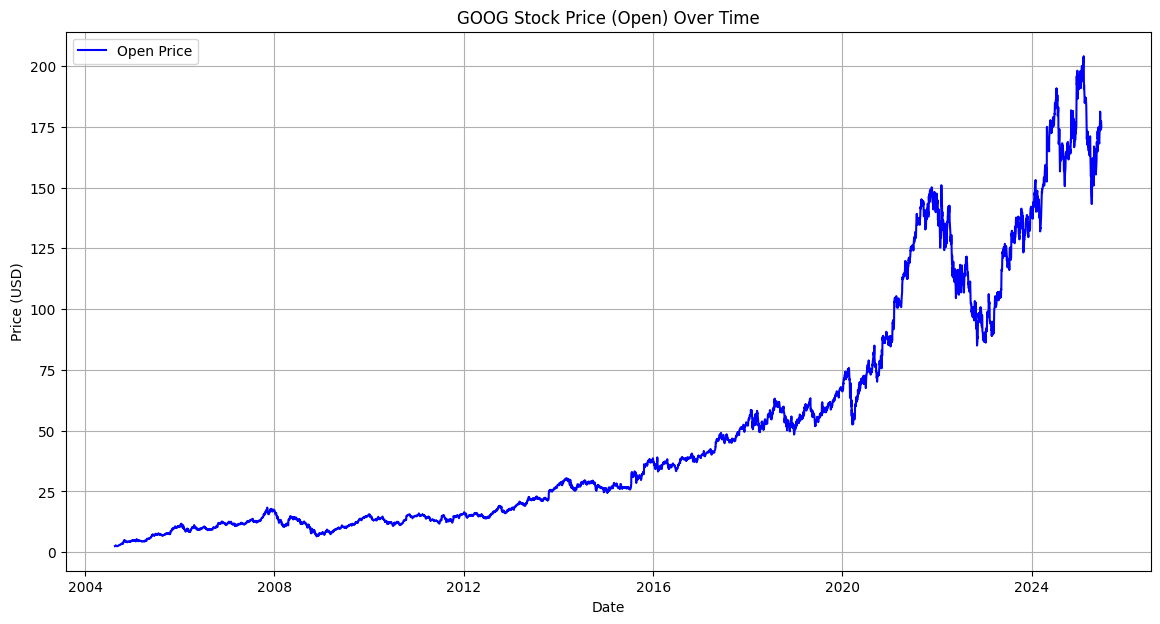

In [42]:
plt.figure(figsize=(14, 7))
plt.plot(df['Open'], label='Open Price', color='blue')
plt.title(f'{stock} Stock Price (Open) Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

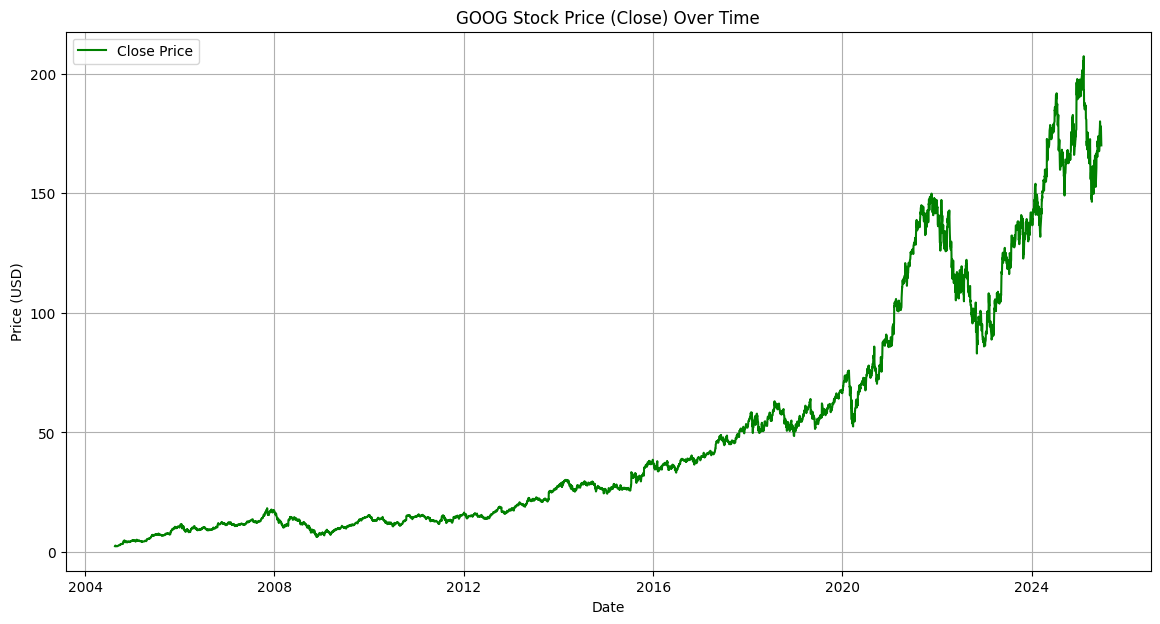

In [43]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='green')
plt.title(f'{stock} Stock Price (Close) Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

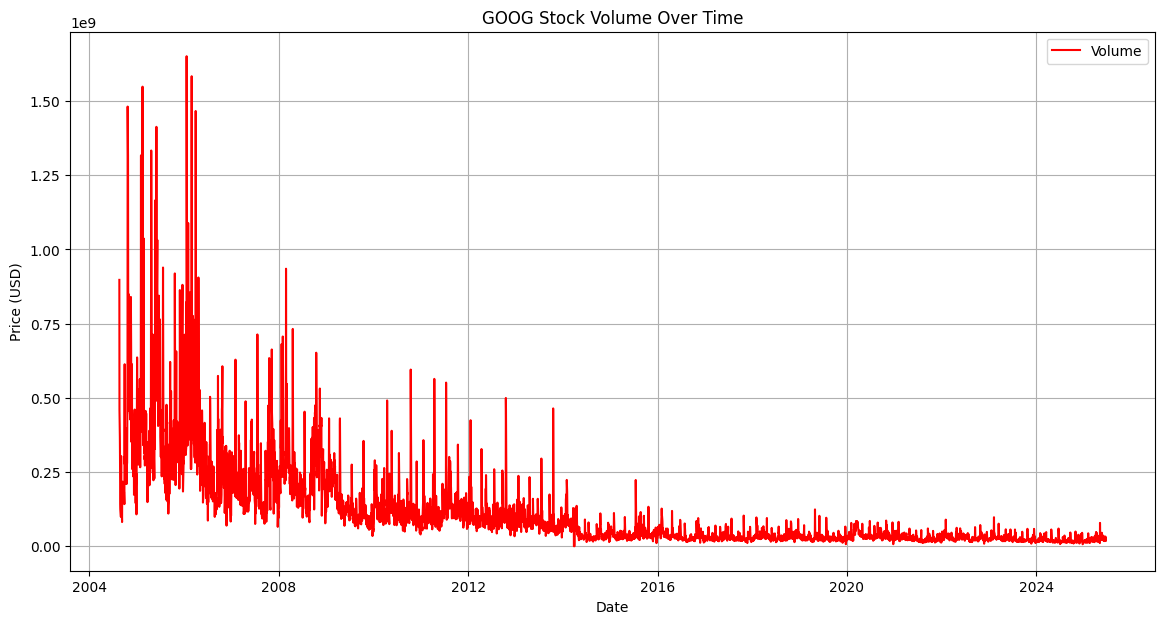

In [44]:
plt.figure(figsize=(14, 7))
plt.plot(df['Volume'], label='Volume', color='red')
plt.title(f'{stock} Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
## Exponential Moving Average (EMA)

ema100 = df.Close.ewm(100, adjust=False).mean()
ema200 = df.Close.ewm(200, adjust=False).mean()

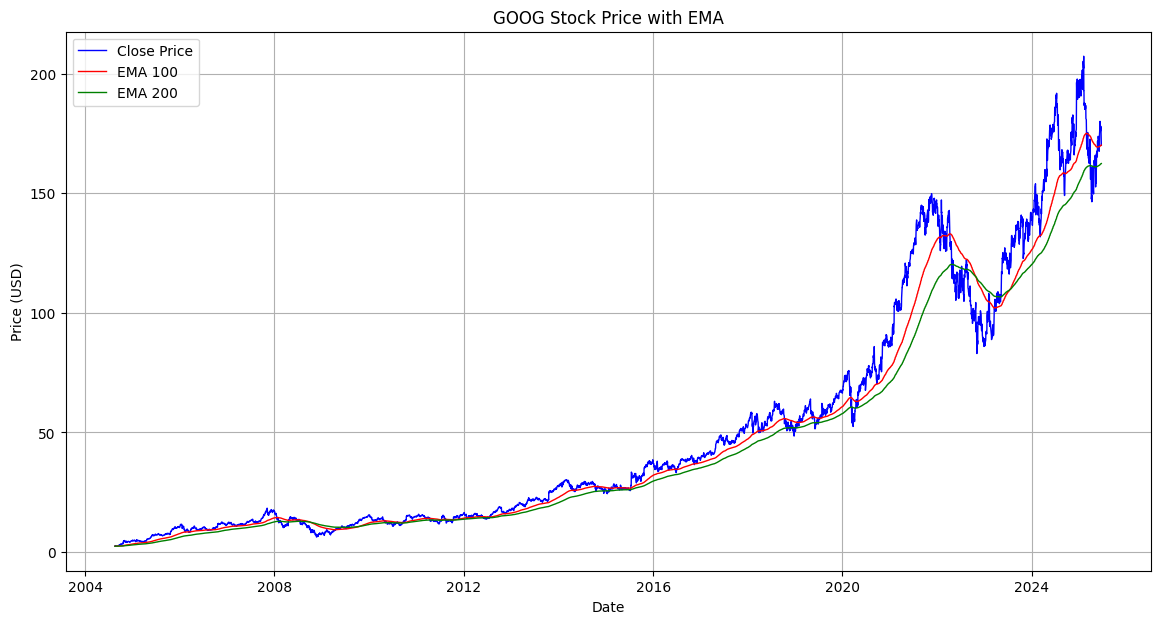

In [46]:
plt.figure(figsize=(14, 7))
plt.plot(df.Close, label='Close Price', color='blue', linewidth=1)
plt.plot(ema100, label='EMA 100', color='red', linewidth=1)
plt.plot(ema200, label='EMA 200', color='green', linewidth=1)
plt.title(f'{stock} Stock Price with EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [80]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [82]:
data_training.shape, data_testing.shape

((3670, 1), (1573, 1))

In [83]:
data_training.head()

,Close
Date,
2004-08-19,2.484366
2004-08-20,2.681699
2004-08-23,2.708686
2004-08-24,2.596526
2004-08-25,2.624503


In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [85]:
train_data_array = scaler.fit_transform(data_training)
print(train_data_array.shape)

(3670, 1)


In [87]:
x_train = []
y_train = []

for i in range(100, train_data_array.shape[0]):
    x_train.append(train_data_array[i-100:i])
    y_train.append(train_data_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [88]:
x_train.shape, y_train.shape

((3570, 100, 1), (3570,))

In [89]:
x_train

array([[[1.34924775e-04],
        [3.39308941e-03],
        [3.83868168e-03],
        ...,
        [3.61955400e-02],
        [3.83622174e-02],
        [3.88568589e-02]],

       [[3.39308941e-03],
        [3.83868168e-03],
        [1.98679732e-03],
        ...,
        [3.83622174e-02],
        [3.88568589e-02],
        [3.82354767e-02]],

       [[3.83868168e-03],
        [1.98679732e-03],
        [2.44873802e-03],
        ...,
        [3.88568589e-02],
        [3.82354767e-02],
        [3.89876779e-02]],

       ...,

       [[8.51983346e-01],
        [8.58950951e-01],
        [8.62808001e-01],
        ...,
        [9.38342885e-01],
        [9.38441330e-01],
        [9.32064583e-01]],

       [[8.58950951e-01],
        [8.62808001e-01],
        [8.64884288e-01],
        ...,
        [9.38441330e-01],
        [9.32064583e-01],
        [9.31170076e-01]],

       [[8.62808001e-01],
        [8.64884288e-01],
        [8.21405089e-01],
        ...,
        [9.32064583e-01],
        [9.3117

In [90]:
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

In [91]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [92]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [93]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [126]:
import tensorflow as tf
print(f"Is the model training on GPU? {tf.config.list_physical_devices('GPU') != []}")

Is the model training on GPU? True


In [101]:
histort = model.fit(x_train, y_train, epochs=50, batch_size=256)

Epoch 1/50
14/14 [==============================] - 11s 799ms/step - loss: 0.0051
Epoch 2/50
14/14 [==============================] - 11s 779ms/step - loss: 0.0047
Epoch 3/50
14/14 [==============================] - 11s 819ms/step - loss: 0.0043
Epoch 4/50
14/14 [==============================] - 14s 990ms/step - loss: 0.0043
Epoch 5/50
14/14 [==============================] - 15s 1s/step - loss: 0.0041
Epoch 6/50
14/14 [==============================] - 12s 827ms/step - loss: 0.0041
Epoch 7/50
14/14 [==============================] - 12s 850ms/step - loss: 0.0042
Epoch 8/50
14/14 [==============================] - 12s 845ms/step - loss: 0.0043
Epoch 9/50
14/14 [==============================] - 12s 842ms/step - loss: 0.0042
Epoch 10/50
14/14 [==============================] - 15s 1s/step - loss: 0.0042
Epoch 11/50
14/14 [==============================] - 12s 883ms/step - loss: 0.0038
Epoch 12/50
14/14 [==============================] - 12s 852ms/step - loss: 0.0038
Epoch 13/50
14/14 [

In [103]:
past_100_days = data_training.tail(100)

In [106]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [107]:
final_df.head()

,Close
0,54.858410
1,52.225067
2,54.454811
3,53.256931
4,50.702621


In [111]:
input_data = scaler.fit_transform(final_df)

In [112]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [113]:
x_test.shape

(1573, 100, 1)

In [114]:
y_predicted = model.predict(x_test)

50/50 [==============================] - 5s 101ms/step


In [115]:
y_predicted.shape

(1573, 1)

In [116]:
scaler.scale_

array([0.00630112])

In [121]:
scaler_factor = 1 / 0.00330112
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

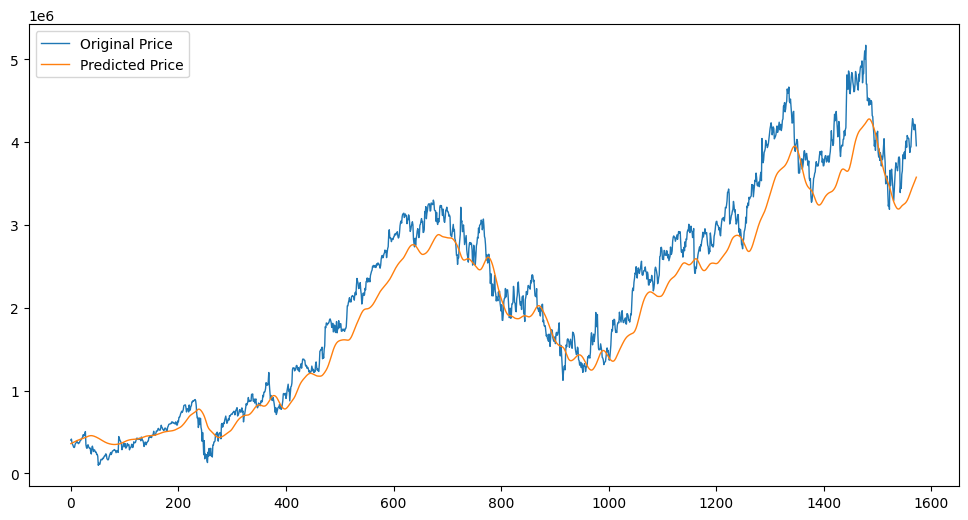

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
model.save('model.keras')